## $K_b = 1.380649 \times 10^{-23}$ J/K

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
def get_linreg(x_vec,y_vec):
    """
    Getting a linear regression: y(x) = m*x + b, from data.
    Returns parameters m, b.
    """
    x = np.array(x_vec).reshape(-1,1)
    y = np.array(y_vec)
    model = LinearRegression().fit(x, y)
    m, b = model.coef_, model.intercept_
    return m,b

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

# Part 1: Plotting for $<V^2_J(t)>/(4T\Delta f)$ vs $R$

In [2]:
G1 = 600
T  = 297.55 # K 


"""# Manual Values: used to proof check the code.
Δf = 111061 
Rin = np.array([1,10,100,1000,10000])
Vsq_mean = np.array([0.6353,0.6372,0.6516,0.7911,0.9801])
G2 = np.array([1500,1500,1500,1500,1000])"""


# First Data Set
Δf = 111061 # Hz
Rin = np.array([1,10,100,1000,10000,100000,1000000])
Vsq_mean = np.array([0.586,0.59,0.603,0.741,0.947,0.847,0.865])
G2 = np.array([1500,1500,1500,1500,1000,400,300])




"""# Second Data Set
Δf = 107740 # Hz
Rin = np.array([1,10,100,1000,10000,100000,1000000])
Vsq_mean = np.array([0.574,0.577,0.5912,0.726,0.926,0.46,0.705])
G2 = np.array([1500,1500,1500,1500,1000,300,300])"""


VnVJ_mean_inferred = ((Vsq_mean*10)/((G1*G2)**2))
Vn_meansq = get_linreg(Rin, VnVJ_mean_inferred)[-1]

VJ_meansq_R = VnVJ_mean_inferred -  Vn_meansq

S_R = VJ_meansq_R/(4*Δf*T)

In [3]:
Vn_meansq

2.0805651710349565e-11

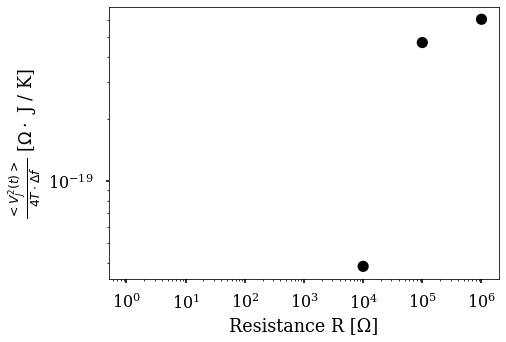

In [4]:
fig = plt.figure(figsize=(7,5))
ax = plt.gca()
ax.scatter( Rin, S_R, c='k', edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("Resistance R [Ω]")
plt.ylabel("$\\frac{<V^2_J(t)>}{4T\\cdot\\Delta f}$ [$\\Omega \\cdot$ J / K]");

# Part 1: Plotting for $<V^2_J(t)>/(4TR)$ vs $\Delta f$

In [5]:
Rin = 1000 # Ω 
G1  = 600 
T   = 297.55 # K 


Δf  = np.array([9,258,355,784,1000,2576,3554,7839,10996,36643,109961,111061]) # Hz
G2  = np.array([10000,10000,10000,10000,10000,10000,6000,6000,5000,3000,1500,1500])
Vsq_mean = np.array([0.005,0.083,113,238,301,765,382,821,795,971,741,743])*1e-3


VnVJ_mean_inferred = ((Vsq_mean*10)/((G1*G2)**2))
Vn_meansq = get_linreg(Δf, VnVJ_mean_inferred)[-1]

VJ_meansq_f = VnVJ_mean_inferred -  Vn_meansq
S_f = VJ_meansq_f/(4*Rin*T)

In [6]:
Vn_meansq

-9.308913744235814e-15

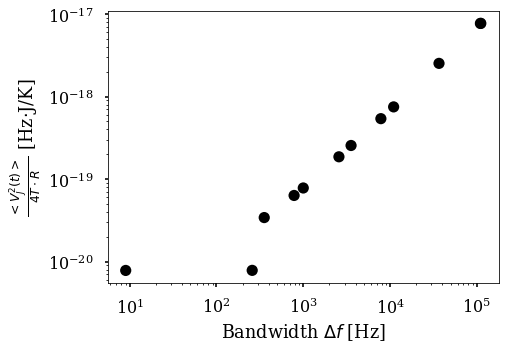

In [7]:
fig = plt.figure(figsize=(7,5))
ax = plt.gca()
ax.scatter( Δf, S_f, c='k', edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("Bandwidth $\\Delta f$ [Hz]")
plt.ylabel("$\\frac{<V^2_J(t)>}{4T\\cdot R}$ [Hz$\\cdot$J/K]");

Calulated Kb (1.380649e-23 J/K): 6.966333920565438e-23


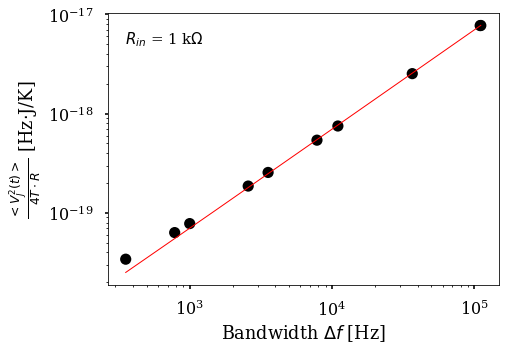

In [8]:
tr = 2 # truncate the first tr points
m, b = get_linreg(Δf[tr:],S_f[tr:])
print(f"Calulated Kb (1.380649e-23 J/K): {m[0]}")

xx = np.linspace(min(Δf[tr:]),max(Δf[tr:]),200)
yy = m*xx + b 

#%matplotlib notebook
fig = plt.figure(figsize=(7,5))
ax = plt.gca()
ax.scatter( Δf[tr:], S_f[tr:], c='k', edgecolors='none')
ax.plot(xx,yy, c="r", lw = 1)
ax.text(350,5e-18,"$R_{in}$ = 1 k$\\Omega$", size=15)
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("Bandwidth $\\Delta f$ [Hz]")
plt.ylabel("$\\frac{<V^2_J(t)>}{4T\\cdot R}$ [Hz$\\cdot$J/K]");